In [1]:
# from google.colab import files
# for i in range(4):
#   files.upload()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install pmdarima

In [4]:
#import useful libraries

import seaborn as sns
import math
import matplotlib
import numpy as np
import pandas as pd
import time
from sklearn import metrics
from sklearn.metrics import r2_score
from datetime import date, datetime, time
from matplotlib import pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
np.warnings.filterwarnings('ignore')
from sklearn import preprocessing
from math import sqrt
from sklearn.linear_model import LinearRegression



In [5]:
sbi_stocks = pd.read_csv(r'/content/drive/MyDrive/SBIN.NS.csv')
indianoil_stocks = pd.read_csv(r'/content/drive/MyDrive/IOC.NS.csv')
reliance_stocks = pd.read_csv(r'/content/drive/MyDrive/RELIANCE.NS.csv')
tata_stocks = pd.read_csv(r'/content/drive/MyDrive/TCS.NS.csv')


In [6]:
print(sbi_stocks.head())
print(indianoil_stocks.head())

         Date        Open        High  ...       Close   Adj Close      Volume
0  2019-07-11  358.500000  364.000000  ...  363.200012  359.877441  20048321.0
1  2019-07-12  363.000000  366.549988  ...  363.600006  360.273773  14661748.0
2  2019-07-15  364.100006  365.000000  ...  360.049988  356.756226  15665939.0
3  2019-07-16  358.500000  366.000000  ...  364.350006  361.016907  16251836.0
4  2019-07-17  364.049988  373.549988  ...  372.399994  368.993256  17545177.0

[5 rows x 7 columns]
         Date        Open        High  ...       Close   Adj Close      Volume
0  2019-07-11  147.500000  148.800003  ...  147.899994  125.827164  11238050.0
1  2019-07-12  147.000000  147.899994  ...  146.850006  124.933884  33350342.0
2  2019-07-15  145.850006  147.350006  ...  145.399994  123.700264   8158174.0
3  2019-07-16  146.000000  148.000000  ...  147.050003  125.104034   7987718.0
4  2019-07-17  149.250000  149.250000  ...  146.850006  124.933884   7908922.0

[5 rows x 7 columns]


In [7]:
#lets combine these datasets to compare the info among them
sbi_stocks['company'] = 'SBI'
indianoil_stocks['company'] = 'INDIAN-OIL'
reliance_stocks['company'] = 'Reliance'
tata_stocks['company'] = 'Tata'

df = pd.concat([sbi_stocks, indianoil_stocks, reliance_stocks, tata_stocks], axis=0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2019-07-11,358.500000,364.000000,357.000000,363.200012,359.877441,20048321.0,SBI
1,2019-07-12,363.000000,366.549988,361.500000,363.600006,360.273773,14661748.0,SBI
2,2019-07-15,364.100006,365.000000,357.600006,360.049988,356.756226,15665939.0,SBI
3,2019-07-16,358.500000,366.000000,357.649994,364.350006,361.016907,16251836.0,SBI
4,2019-07-17,364.049988,373.549988,363.049988,372.399994,368.993256,17545177.0,SBI


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 494
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1980 non-null   object 
 1   Open       1972 non-null   float64
 2   High       1972 non-null   float64
 3   Low        1972 non-null   float64
 4   Close      1972 non-null   float64
 5   Adj Close  1972 non-null   float64
 6   Volume     1972 non-null   float64
 7   company    1980 non-null   object 
dtypes: float64(6), object(2)
memory usage: 139.2+ KB


In [9]:
df.dropna(inplace=True)
companies = [sbi_stocks, indianoil_stocks, reliance_stocks, tata_stocks]
company_name = ["SBI", "INDIAN-OIL", "Reliance", "Tata"]

In [10]:
#removing missing values in individual stocks
sbi_stocks.dropna(inplace=True)
reliance_stocks.dropna(inplace=True)
indianoil_stocks.dropna(inplace=True)
tata_stocks.dropna(inplace=True)

In [11]:
#sort the date values and make it as a index of the dataframe
#compare the closing price of these companies over the years
for i, company in enumerate(companies):
  company.sort_values(by='Date', inplace=True)
  company.set_index(company.Date, inplace=True)




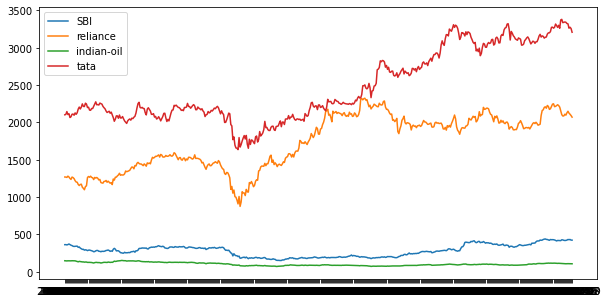

In [12]:
#plot the closing price of companies 

plt.figure(figsize=(10, 5))
plt.plot(sbi_stocks.Close, label='SBI')
plt.plot(reliance_stocks.Close, label='reliance')
plt.plot(indianoil_stocks.Close, label='indian-oil')
plt.plot(tata_stocks.Close, label='tata')
plt.legend()

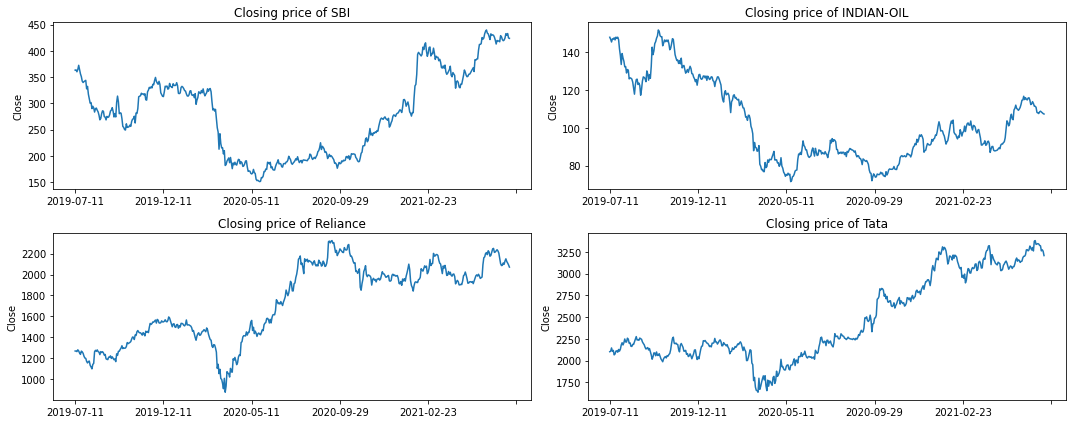

In [13]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies):
    plt.subplot(2, 2, i+1)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f'Closing price of {company_name[i]}')
    # plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

In [14]:
reliance_stocks.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume,company
Date,,,,,,,,
2021-06-14,2021-06-14,2215.000000,2258.250000,2195.050049,2244.899902,2244.899902,9383416.0,Reliance
2021-06-15,2021-06-15,2261.000000,2274.899902,2240.300049,2250.000000,2250.000000,7002898.0,Reliance
2021-06-16,2021-06-16,2244.899902,2247.050049,2205.850098,2211.600098,2211.600098,4982975.0,Reliance
2021-06-17,2021-06-17,2200.000000,2235.000000,2179.899902,2215.649902,2215.649902,7266765.0,Reliance
2021-06-18,2021-06-18,2225.500000,2235.000000,2184.350098,2225.649902,2225.649902,13553801.0,Reliance
2021-06-21,2021-06-21,2203.500000,2247.500000,2200.149902,2237.250000,2237.250000,5624044.0,Reliance
2021-06-22,2021-06-22,2254.000000,2261.000000,2219.350098,2225.750000,2225.750000,5940386.0,Reliance
2021-06-23,2021-06-23,2250.000000,2250.600098,2201.699951,2205.350098,2205.350098,7685796.0,Reliance
2021-06-24,2021-06-24,2206.850098,2214.600098,2140.000000,2153.500000,2153.500000,42209687.0,Reliance


### Plotting Moving Average

In [15]:
#finding the moving average of all the stocks

#adding moving average columns for 10, 20, 50 days
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in companies:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

reliance_stocks.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,company,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,,
2019-07-11,2019-07-11,1274.915039,1277.688843,1267.287354,1269.516235,1253.768555,3972764.0,Reliance,NaN,NaN,NaN
2019-07-12,2019-07-12,1270.952637,1287.792969,1266.049072,1268.476074,1252.741211,7242056.0,Reliance,NaN,NaN,NaN
2019-07-15,2019-07-15,1272.933838,1277.391602,1258.421387,1264.117432,1248.436646,4919356.0,Reliance,NaN,NaN,NaN
2019-07-16,2019-07-16,1267.931274,1282.740845,1265.058472,1280.858765,1264.970337,4647660.0,Reliance,NaN,NaN,NaN
2019-07-17,2019-07-17,1282.146484,1284.821167,1267.980835,1269.813477,1254.062012,4376049.0,Reliance,NaN,NaN,NaN
2019-07-18,2019-07-18,1269.962036,1274.320679,1246.187378,1250.001221,1234.495483,5511650.0,Reliance,NaN,NaN,NaN
2019-07-19,2019-07-19,1256.291626,1260.996948,1231.031006,1237.271851,1221.924194,7539309.0,Reliance,NaN,NaN,NaN
2019-07-22,2019-07-22,1239.253174,1272.438599,1215.775635,1268.476074,1252.741211,13426225.0,Reliance,NaN,NaN,NaN
2019-07-23,2019-07-23,1272.933838,1281.750244,1248.564819,1261.591431,1245.942017,9375991.0,Reliance,NaN,NaN,NaN


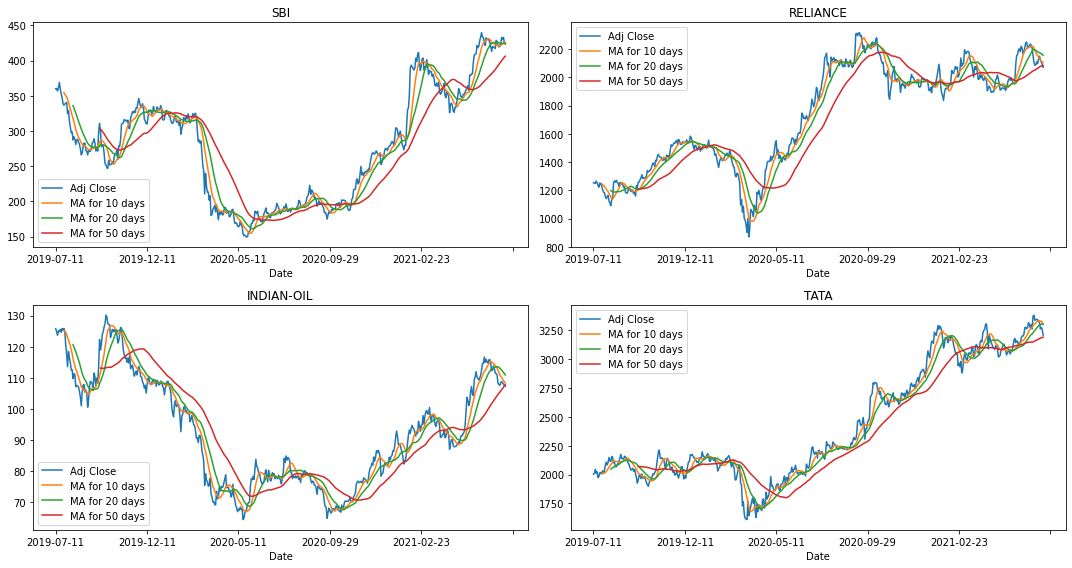

In [16]:
#plotting the moving average with adjusted close price to get better understanding ofdata
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)


sbi_stocks[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('SBI')

reliance_stocks[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('RELIANCE')

indianoil_stocks[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('INDIAN-OIL')

tata_stocks[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TATA')

fig.tight_layout()

### Daily returns

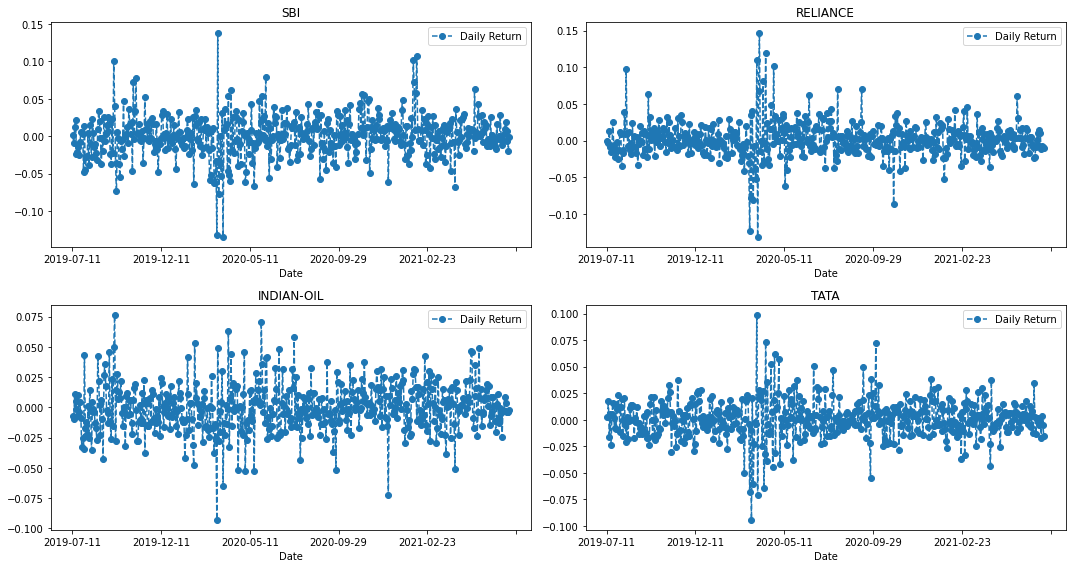

In [17]:

#percentage daily returns on stocks of compnaies

for company in companies:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

sbi_stocks['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o' )
axes[0,0].set_title('SBI')

reliance_stocks['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o' )
axes[0,1].set_title('RELIANCE')

indianoil_stocks['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o' )
axes[1,0].set_title('INDIAN-OIL')

tata_stocks['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o' )
axes[1,1].set_title('TATA')


fig.tight_layout()

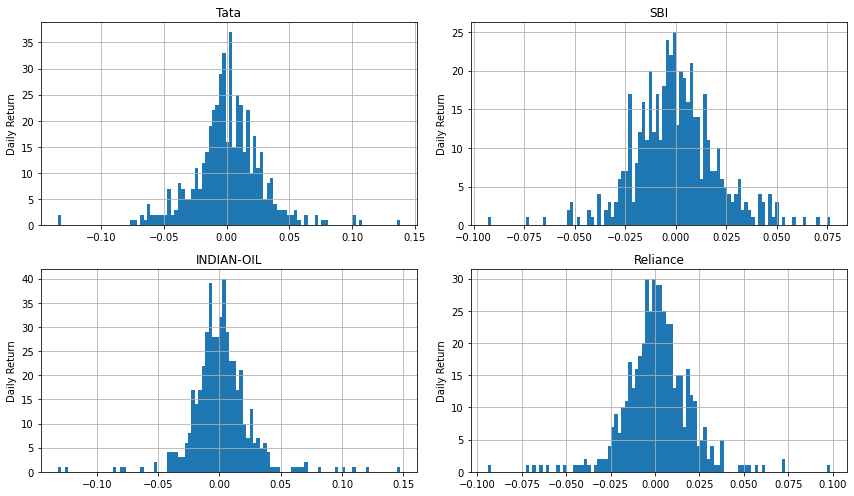

In [18]:
# distribution of daily returns

plt.figure(figsize=(12, 7))

for i, company in enumerate(companies, 0):
    plt.subplot(2, 2, i+1)
    company['Daily Return'].hist(bins=100)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

### Correlation among daily returns percentage change 

In [19]:
#creating a new dataframe with adj_closing price of  different companies

adj_closing_df = pd.concat([indianoil_stocks['Adj Close'], reliance_stocks['Adj Close'],
                            sbi_stocks['Adj Close'], tata_stocks['Adj Close']], axis=1, 
                           )
adj_closing_df.columns = ['indian-oil', 'reliance', 'sbi', 'tata']
adj_closing_df = adj_closing_df.pct_change()
adj_closing_df.dropna(inplace=True)
adj_closing_df.head()

,indian-oil,reliance,sbi,tata
Date,,,,
2019-07-12,-0.007099,-0.000819,0.001101,0.002402
2019-07-15,-0.009874,-0.003436,-0.009764,0.018077
2019-07-16,0.011348,0.013244,0.011943,-0.016209
2019-07-17,-0.001360,-0.008623,0.022094,0.005342
2019-07-18,0.005107,-0.015603,-0.023496,-0.024230


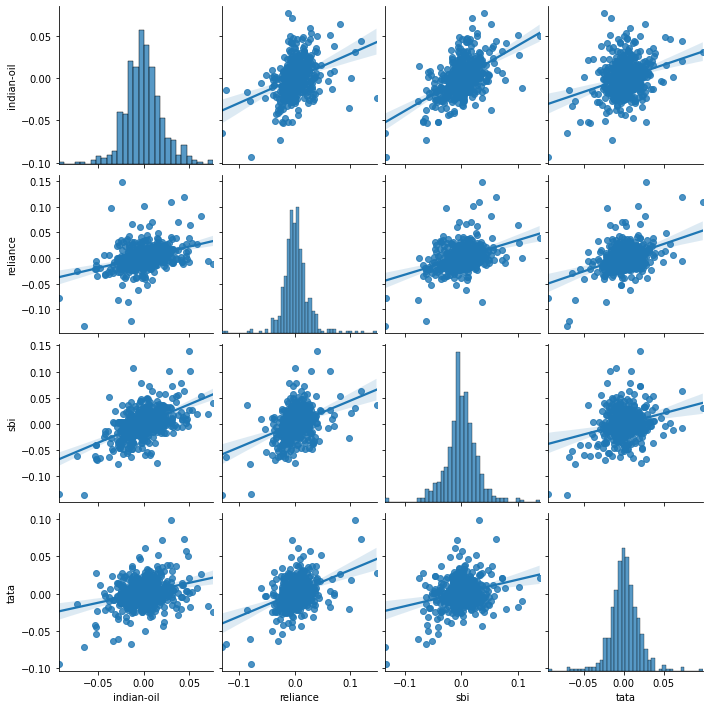

In [20]:
sns.pairplot(adj_closing_df, kind='reg')

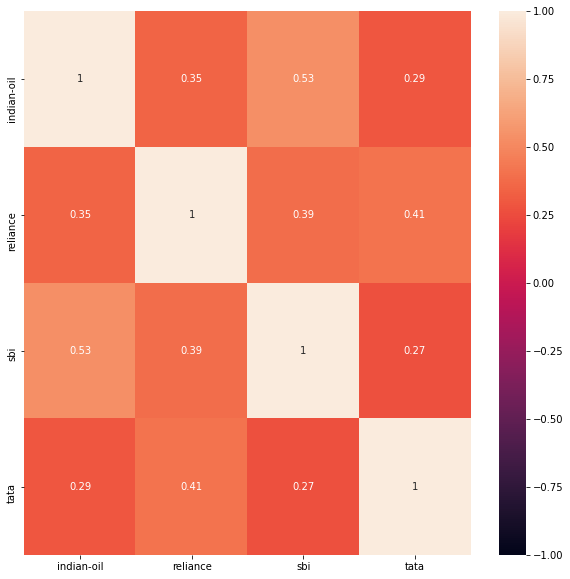

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(adj_closing_df.corr(), vmin=-1, vmax=1, annot=True)

### Risk involved against expected return

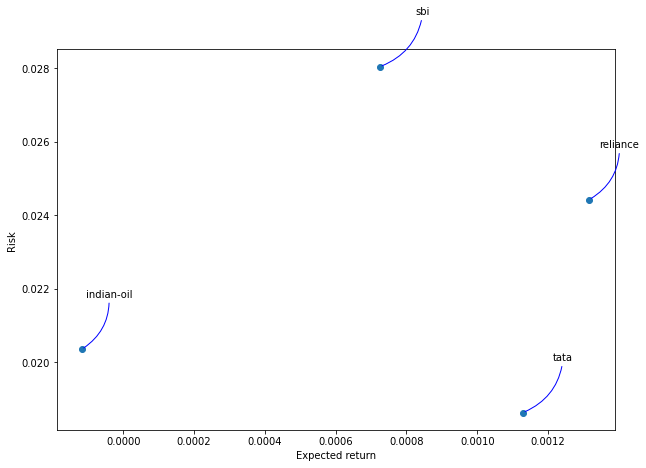

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(adj_closing_df.mean(), adj_closing_df.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(adj_closing_df.columns, adj_closing_df.mean(), adj_closing_df.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Predicting the closing price of Tata consultancy services

### Linear Regression

In [23]:
#Seperating 'Open','Close', and 'Volume' columns for prediction
dfreg = tata_stocks.loc[:,['Open','Close','Volume']]

In [24]:
forecast_out = int(math.ceil(0.01* len(dfreg)))

dfreg['label'] = dfreg['Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [25]:
x_train=X[:math.floor(0.8*len(X))]
x_test=X[math.floor(0.8*len(X)):]
y_train=y[:math.floor(0.8*len(y))]
y_test=y[math.floor(0.8*len(y)):]

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
predicted = regressor.predict(x_test)
print(r2_score(y_test,predicted))

0.4031275950798796


In [27]:
df5 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
df5.head(15)

,Actual,Predicted
0,3108.800049,3193.657628
1,3073.100098,3226.023985
2,3057.350098,3215.909687
3,3071.850098,3207.167217
4,2958.449951,3158.323517
5,2980.199951,3129.464968
6,2948.100098,3094.180988
7,2995.300049,3079.579493
8,2894.300049,3091.208532
9,2924.199951,2990.608784


Mean Absolute Error: 68.20426917720644
Root Mean Squared Error: 83.87720739819926


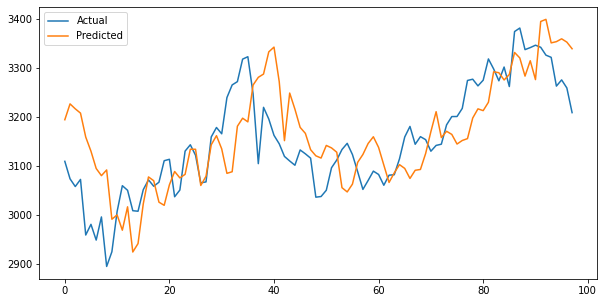

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))
df5.plot(figsize=(10,5))

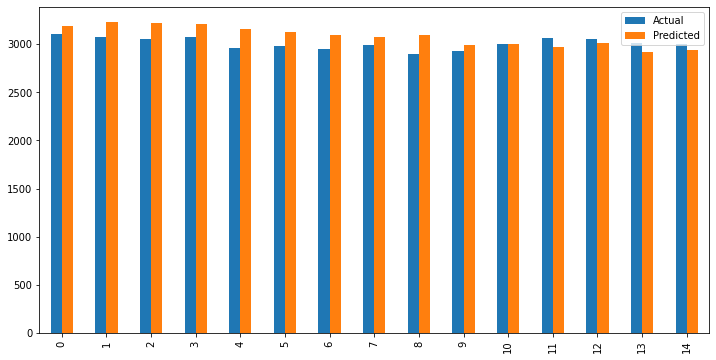

In [29]:
graph = df5.head(15)
graph.plot(kind='bar',figsize=(12,6))

### LSTM

In [30]:
#Now we will predict the stock prices of TATA CONSULTANCY SERVICES  using MACHINE LEARNING ALGORITHMS
tata_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,,
2019-07-11,2019-07-11,2128.000000,2129.000000,2086.050049,2102.550049,2004.347656,2400346.0,Tata,NaN,NaN,NaN,NaN
2019-07-12,2019-07-12,2102.100098,2119.750000,2093.100098,2107.600098,2009.161865,1560725.0,Tata,NaN,NaN,NaN,0.002402
2019-07-15,2019-07-15,2125.000000,2153.600098,2098.000000,2145.699951,2045.482056,2900415.0,Tata,NaN,NaN,NaN,0.018077
2019-07-16,2019-07-16,2126.000000,2132.500000,2100.000000,2106.000000,2012.326050,2735399.0,Tata,NaN,NaN,NaN,-0.016209
2019-07-17,2019-07-17,2108.000000,2125.000000,2092.100098,2117.250000,2023.075439,1802969.0,Tata,NaN,NaN,NaN,0.005342


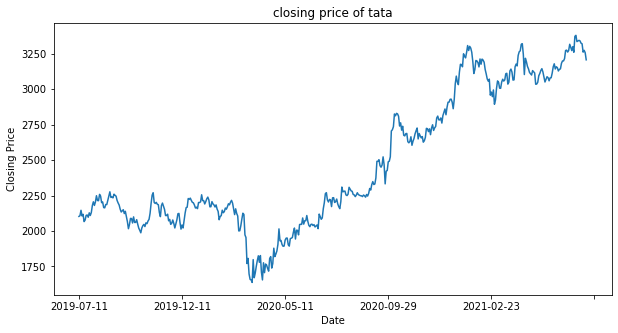

In [31]:
#see the closing price of tata
tata_stocks['Close'].plot(title='closing price of tata', figsize=(10, 5), ylabel='Closing Price')

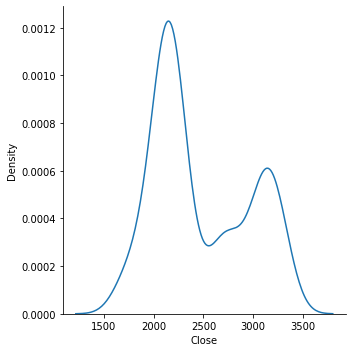

In [32]:
sns.displot(tata_stocks.Close, kind='kde')

In [33]:
#using LSTM model for prediction of closing price from previous closing price
import tensorflow as tf
from tensorflow.keras import layers


In [34]:
tata_closing_price = tata_stocks.Close.values
tata_closing_price[:30]

array([2102.550049, 2107.600098, 2145.699951, 2106.      , 2117.25    ,
       2065.949951, 2076.949951, 2109.899902, 2112.449951, 2096.800049,
       2127.899902, 2109.050049, 2130.      , 2179.149902, 2205.699951,
       2180.050049, 2205.300049, 2248.600098, 2214.899902, 2213.449951,
       2258.100098, 2246.25    , 2199.449951, 2204.399902, 2165.100098,
       2163.      , 2186.75    , 2186.199951, 2216.      , 2247.699951])

In [35]:
# Create a new dataframe with only the 'Close column 
data = tata_stocks.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

469

In [36]:
dataset.shape

(493, 1)

In [37]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.26724759],
       [0.27014251],
       [0.29198312],
       [0.26922526],
       [0.27567428],
       [0.24626671],
       [0.25257242],
       [0.27146087],
       [0.27292267],
       [0.26395142],
       [0.2817793 ],
       [0.27097369],
       [0.28298318],
       [0.31115819],
       [0.32637791],
       [0.3116742 ],
       [0.32614867],
       [0.35097028],
       [0.33165175],
       [0.33082057],
       [0.35641612],
       [0.34962309],
       [0.32279512],
       [0.32563266],
       [0.30310419],
       [0.30190031],
       [0.31551492],
       [0.31519961],
       [0.33228238],
       [0.35045427],
       [0.36684918],
       [0.34403394],
       [0.34561036],
       [0.34228551],
       [0.35727599],
       [0.35269001],
       [0.34913577],
       [0.33188114],
       [0.32167732],
       [0.31327931],
       [0.29674109],
       [0.28504692],
       [0.28983345],
       [0.29444811],
       [0.27876976],
       [0.28788446],
       [0.26690358],
       [0.245

In [38]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.26724759, 0.27014251, 0.29198312, 0.26922526, 0.27567428,
       0.24626671, 0.25257242, 0.27146087, 0.27292267, 0.26395142,
       0.2817793 , 0.27097369, 0.28298318, 0.31115819, 0.32637791,
       0.3116742 , 0.32614867, 0.35097028, 0.33165175, 0.33082057,
       0.35641612, 0.34962309, 0.32279512, 0.32563266, 0.30310419,
       0.30190031, 0.31551492, 0.31519961, 0.33228238, 0.35045427,
       0.36684918, 0.34403394, 0.34561036, 0.34228551, 0.35727599,
       0.35269001, 0.34913577, 0.33188114, 0.32167732, 0.31327931,
       0.29674109, 0.28504692, 0.28983345, 0.29444811, 0.27876976,
       0.28788446, 0.26690358, 0.24598008, 0.21751845, 0.23408522,
       0.25916475, 0.25867758, 0.24064886, 0.26538454, 0.24282723,
       0.24299923, 0.2539483 , 0.23580496, 0.21998337, 0.21101204])]
[0.20092291858902644]

[array([0.26724759, 0.27014251, 0.29198312, 0.26922526, 0.27567428,
       0.24626671, 0.25257242, 0.27146087, 0.27292267, 0.26395142,
       0.2817793 , 0.27097369, 0.28

In [39]:
# Defining model architecture and training

# Build the LSTM model
model = tf.keras.Sequential()

#LSTM layers
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(64, return_sequences=False))
#Dense Layers
model.add(layers.Dense(25))
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
409/409 [==============================] - 17s 32ms/step - loss: 0.0066 - root_mean_squared_error: 0.0812
Epoch 2/10
409/409 [==============================] - 13s 32ms/step - loss: 0.0025 - root_mean_squared_error: 0.0502
Epoch 3/10
409/409 [==============================] - 13s 32ms/step - loss: 0.0027 - root_mean_squared_error: 0.0515
Epoch 4/10
409/409 [==============================] - 13s 33ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396
Epoch 5/10
409/409 [==============================] - 14s 33ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416
Epoch 6/10
409/409 [==============================] - 13s 33ms/step - loss: 0.0016 - root_mean_squared_error: 0.0397
Epoch 7/10
409/409 [==============================] - 14s 35ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370
Epoch 8/10
409/409 [==============================] - 14s 33ms/step - loss: 0.0013 - root_mean_squared_error: 0.0361
Epoch 9/10
409/409 [==============================] - 14s 34ms/s

In [40]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


35.306473392287735

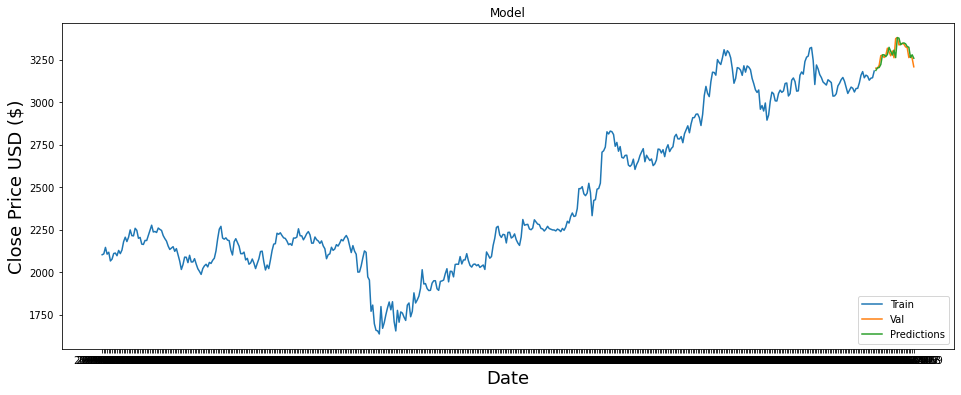

In [41]:
# Plot the data
# plot vs actual and predicted stock price results
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [42]:
# !pip3 uninstall statsmodels 
# !pip3 install numpy scipy patsy pandas
# !pip3 install statsmodels


## ARIMA model for making predictions

In [43]:
#import necessary libraries

# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.arima_model import ARIMA
# # from pyramid.arima import auto_arima
# # from pyramid.arima import ADFTest
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# import pmdarima.arima

In [44]:
#ADF Test for checking if data is stationary
print("Results of Dicky-Fuller Test:")
dftest = adfuller(tata_stocks['Close'][:438], autolag='AIC',regression='ctt')

dfoutput = pd.Series(dftest[0:4], index=['ADF Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dicky-Fuller Test:
ADF Statistic                   -2.740480
p-value                          0.431386
#Lags Used                       0.000000
Number of Observations Used    437.000000
Critical Value (1%)             -4.397839
Critical Value (5%)             -3.845971
Critical Value (10%)            -3.561663
dtype: float64


In [45]:
#splitting data 
train_data = tata_stocks['Close'][:len(tata_stocks)-55]
test_data = tata_stocks['Close'][len(tata_stocks)-55:]

In [46]:
#Finding Best Model Parameters
arima_model =  auto_arima(train_data,start_p=0, d=1, start_q=0, max_p=3, max_d=3, max_q=3, start_P=0, 
                          D=1, start_Q=0, max_P=9, max_D=5,max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,supress_warnings=True,stepwise = True,
                          random_state=42,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4671.063, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4602.503, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.93 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4672.810, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4534.659, Time=0.88 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=4500.116, Time=1.72 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=4494.436, Time=3.50 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=4490.036, Time=4.98 sec
 ARIMA(1,1,0)(6,1,0)[12]             : AIC=4484.635, Time=8.86 sec
 ARIMA(1,1,0)(7,1,0)[12]             : AIC=4482.721, Time=13.87 sec
 ARIMA(1,1,0)(8,1,0)[12]             : AIC=4482.661, Time=22.53 sec
 ARIMA(1,1,0)(9,1,0)[12]             : AIC=4472.627, Time=35.33 sec
 ARIMA(1,1,0)(9,1,1)[12]             : AIC=inf, Time=145.35 sec
 ARIMA(1,1,0)(8,1,1)[12]             : AIC=inf, Time=78.32 sec
 ARIMA(0,1,0)(9,1,0)[12]    

In [47]:
arima_model = SARIMAX(train_data, order = (0,1,0), seasonal_order = (9,1,0,12), n_fits=50)
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  438
Model:             SARIMAX(0, 1, 0)x(9, 1, 0, 12)   Log Likelihood               -2226.004
Date:                            Tue, 13 Jul 2021   AIC                           4472.008
Time:                                    10:31:34   BIC                           4512.528
Sample:                                         0   HQIC                          4488.016
                                            - 438                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7989      0.049    -16.364      0.000      -0.895      -0.703
ar.S.L24      -0.7992      0.058    -13.795      0.000      -0.913      -0.686
ar.S.L36      -0.6595      0.068     -9.667      0.000      -0.793      -0.526
ar.S.L48      -0.4903      0.076     -6.438      0.000      -0.640      -0.341
ar.S.L60      -0.4242      0.077     -5.508      0.000      -0.575      -0.273
ar.S.L72      -0.3883      0.081     -4.793      0.000      -0.547      -0.230
ar.S.L84      -0.2944      0.070     -4.192      0.000      -0.432      -0.157
ar.S.L96      -0.2123      0.063     -3.357      0.001      -0.336      -0.088
ar.S.L108     -0.1821      0.051     -3.594      0.000      -0.281      -0.083
sigma2      1987.2594    113.535     17.503      0.000    1764.734    2209.784
===================================================================================
Ljung-Box (L1) (Q):                   1.37   Jarque-Bera (JB):                39.44
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               2.31   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
#Predictions
arima_pred = arima_result.predict(start = len(train_data), end = len(tata_stocks)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

438    3141.097470
439    3131.704845
440    3125.565860
441    3153.458090
442    3159.811478
443    3126.611958
444    3096.359934
445    3127.622004
446    3134.400615
447    3110.214867
448    3115.234711
449    3110.729695
450    3140.973708
451    3121.467617
452    3104.788032
453    3138.895911
454    3155.841370
455    3147.867050
456    3135.238577
457    3154.259582
458    3160.389040
459    3155.560554
460    3168.880880
461    3175.246498
462    3211.285672
463    3210.258572
464    3185.451093
465    3215.197042
466    3235.828754
467    3226.845447
468    3201.117435
469    3219.605392
470    3218.757910
471    3225.025622
472    3224.202814
473    3241.273757
474    3268.343384
475    3276.484407
476    3258.132991
477    3287.905238
478    3299.107565
479    3270.530247
480    3236.234799
481    3266.739280
482    3261.895086
483    3240.489533
484    3251.557112
485    3272.743843
486    3302.712070
487    3288.670898
488    3277.769628
489    3318.361563
490    3336.

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
arima_pred4 = list(arima_result.predict(start = len(train_data), end = len(tata_stocks)-1, typ="levels"))
print('ARIMA model MAE:{}'.format(mean_absolute_error(test_data,arima_pred4)))
print('ARIMA model RMSE:{}'.format((mean_squared_error(test_data,arima_pred4))**0.5))

ARIMA model MAE:47.712847181673915
ARIMA model RMSE:56.06510621466655


In [50]:
print(r2_score(test_data,arima_result.predict(start = len(train_data), end = len(tata_stocks)-1, typ="levels")))

0.6799369544274714


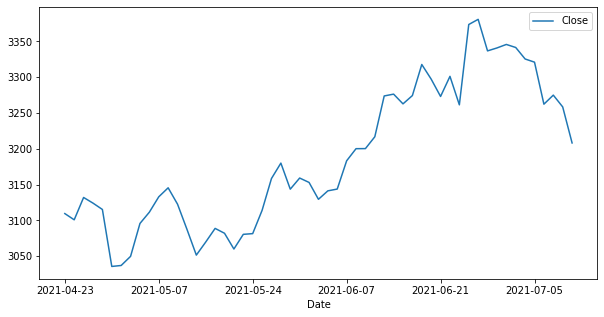

In [51]:
test_data.plot(figsize = (10,5), legend=True)

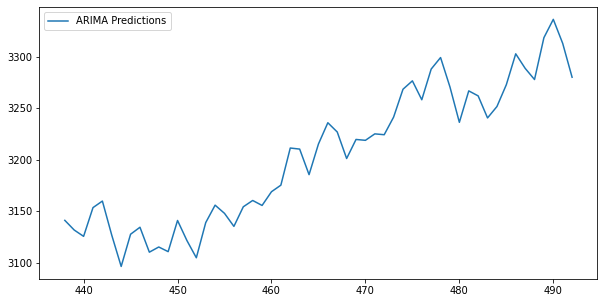

In [52]:
arima_pred.plot(figsize = (10,5), legend=True);

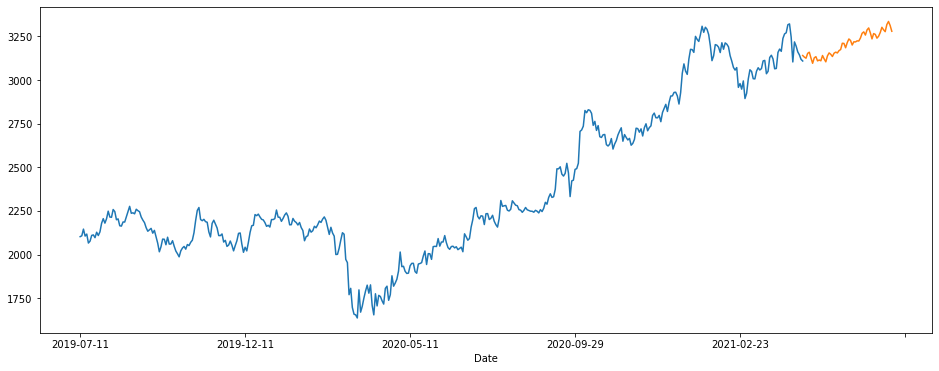

In [53]:
arima_pred=[None]*438
arima_pred2 = list(arima_result.predict(start = len(train_data), end = len(tata_stocks)-1, typ="levels"))
arima_pred=arima_pred+arima_pred2
tata_stocks['forecast']=arima_pred
tata_stocks['Close'][:439].plot(figsize=(16, 6))
tata_stocks['forecast'].plot(figsize=(16, 6))
plt.show()


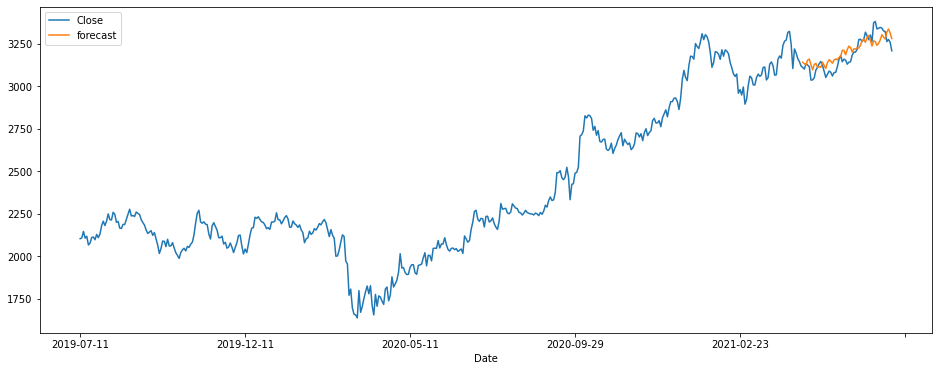

In [54]:
arima_pred=[None]*438
arima_pred2 = list(arima_result.predict(start = len(train_data), end = len(tata_stocks)-1, typ="levels"))
arima_pred=arima_pred+arima_pred2
tata_stocks['forecast']=arima_pred
tata_stocks[['Close', 'forecast']].plot(figsize=(16, 6))
plt.show()

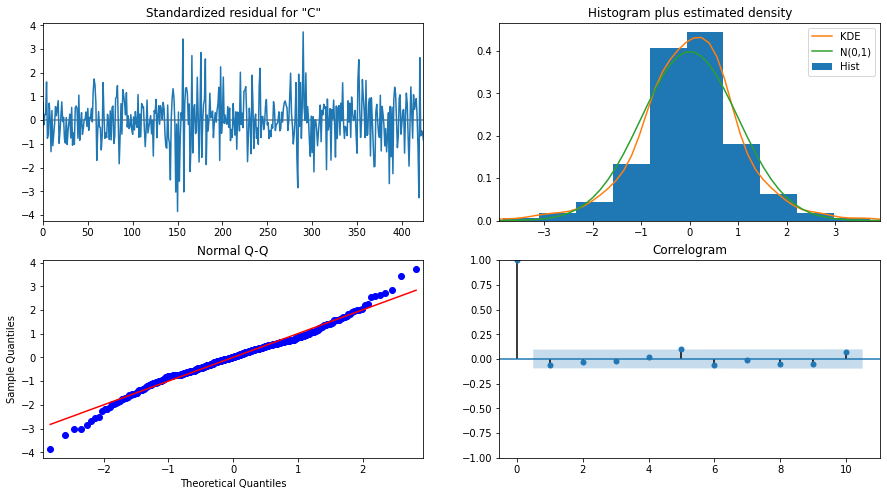

In [55]:
arima_result.plot_diagnostics(figsize=(15,8))
plt.show()